In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the data
df = pd.read_csv("amazon_orders.csv")

# Display the first few rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          247 non-null    int64 
 1   Order Number  247 non-null    object
 2   Date          247 non-null    object
 3   Total Price   238 non-null    object
 4   Product       247 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB


In [14]:
# Check for missing values
print(df.isnull().sum())

# Drop empty rows if necessary
df.dropna(inplace=True)

# Convert 'Total Price' to numeric (remove currency symbols)
df["Total Price"] = df["Total Price"].replace('[₹,]', '', regex=True).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract month and day of the week for analysis
df['Month'] = df['Date'].dt.strftime('%b')  # Short month name
df['Month_Num'] = df['Date'].dt.month       # Month number for sorting
df['Day_of_Week'] = df['Date'].dt.day_name()  # Day of the week


# Display the cleaned data
df.head()


Year            0
Order Number    0
Date            0
Total Price     9
Product         0
dtype: int64


,Year,Order Number,Date,Total Price,Product,Month,Month_Num,Day_of_Week
0,2024,408-2652756-4522741,2024-12-19,4545.0,Philips Cordless Epilator– All-Rounder for Fac...,Dec,12,Thursday
1,2024,408-4122061-0998700,2024-12-02,8999.0,Aquaguard Sure Delight NXT 6-Stage Water Purif...,Dec,12,Monday
2,2024,408-0433893-3521114,2024-12-02,0.0,Kitchen Installation Service by Eureka Forbes,Dec,12,Monday
3,2024,408-6100760-7361151,2024-11-28,147.0,Ferrai Girl's Stretchable Belt Pack of 1 Black...,Nov,11,Thursday
4,2024,408-5313454-9553129,2024-11-28,645.0,Harpic Limescale Remover 750ml,Nov,11,Thursday


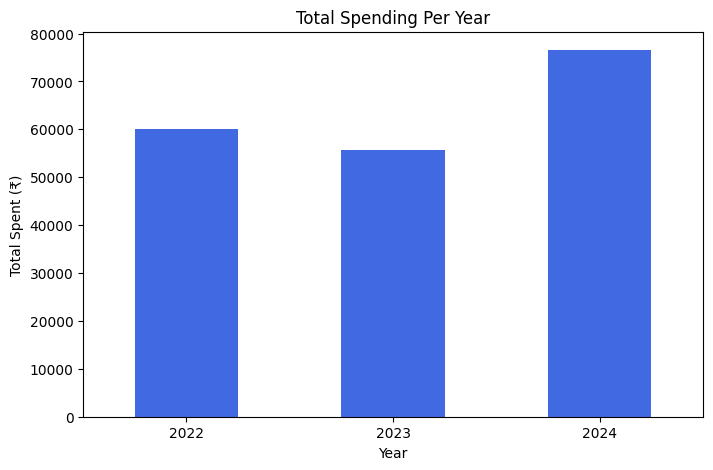

In [ ]:
# Group by Year and sum Total Price
yearly_spending = df.groupby("Year")["Total Price"].sum()

# Plot
plt.figure(figsize=(8,5))
yearly_spending.plot(kind="bar", color="royalblue")
plt.xlabel("Year")
plt.ylabel("Total Spent (₹)")
plt.title("Total Spending Per Year")
plt.xticks(rotation=0)
plt.show()
